In [ ]:
#! pip install pymc3

In [ ]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az


In [ ]:
n = 100
theta_0 = 2.0
theta_1 = 0.7
epsilon = np.random.normal(0,.5,n)
x = np.random.uniform(0,20, n)


In [ ]:
y = theta_0 + theta_1 * x + epsilon
y

array([ 2.90773765,  7.54562957,  6.43073073,  8.68235678,  2.99510048,
       15.65596523,  8.92760157,  4.86978583, 11.38671892, 15.74259533,
        7.9140014 ,  7.07850545,  9.27376821,  7.85203523,  9.14323843,
       13.97967354,  4.7710535 ,  4.30841792, 12.42472207,  2.33984793,
        8.19649043, 13.15302589,  7.19974726, 14.92976529, 10.85022638,
        8.8171126 , 14.76223413, 16.08390938, 14.98938759, 14.102401  ,
        7.81327439,  2.82592217, 12.86228567, 13.99433021,  3.87902845,
       13.93982446,  7.27805829,  6.4916031 ,  3.30697385,  7.59357476,
       13.57893211, 10.11521521, 15.19280248,  6.67054937,  5.00300013,
       13.05830323,  2.74565395,  7.39260184, 13.54269901,  2.40513051,
        2.75112394, 13.33228864, 11.57601108, 11.41834905,  5.81842022,
        7.7716218 , 14.25330493,  8.35928925,  7.57588904,  6.94013507,
       10.42200421,  7.22240549,  8.7442923 , 13.62832329,  2.35805937,
        7.5991152 , 10.87698953,  6.2503109 ,  4.32566839,  6.46

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


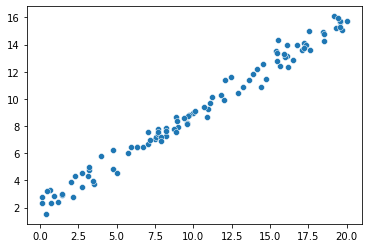

In [ ]:
sns.scatterplot(x,y)

In [ ]:
with pm.Model() as Reg_Model:
  #priors
  feta_0 = pm.Normal('inter', mu  = 0, sd = 14)
  feta_1 = pm.Normal('slope', mu  = 0, sd = 2)
  e = pm.Normal('epsilon', 5)
  μ = pm.Deterministic('μ', feta_0 + feta_1 * x)
  #Likelihood
  y_obs = pm.Normal('y_obs', mu = μ, sd = e, observed = y)
  trace_Reg = pm.sample(2000, tune = 1000)
  
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if __name__ == '__main__':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [epsilon, slope, inter]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 7 seconds.


In [ ]:
y = theta_0 + theta_1*x + epsilon

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99ae3aba50>,
      dtype=object)

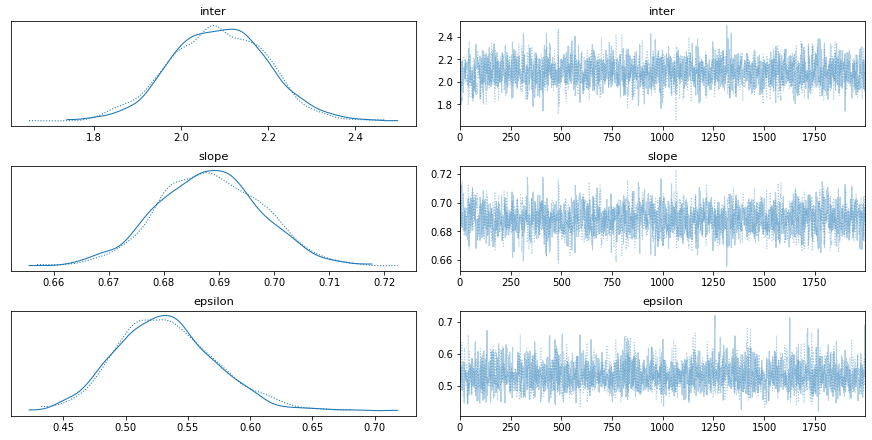

In [ ]:
az.plot_trace(trace_Reg, var_names= ['inter', 'slope', 'epsilon'])

In [ ]:
az.summary(trace_Reg)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
inter,2.086,0.110,1.875,2.285,0.003,0.002,1786.0,2021.0,1.0
slope,0.688,0.009,0.672,0.707,0.000,0.000,1664.0,1743.0,1.0
epsilon,0.533,0.040,0.462,0.608,0.001,0.001,2283.0,1876.0,1.0
μ[0],3.066,0.099,2.878,3.244,0.002,0.002,1845.0,2032.0,1.0
μ[1],6.926,0.062,6.808,7.038,0.001,0.001,2518.0,2735.0,1.0
...,...,...,...,...,...,...,...,...,...
μ[95],12.242,0.070,12.114,12.375,0.001,0.001,2710.0,2872.0,1.0
μ[96],15.546,0.103,15.349,15.741,0.002,0.002,2089.0,2324.0,1.0
μ[97],12.707,0.074,12.572,12.847,0.001,0.001,2541.0,2789.0,1.0
μ[98],6.444,0.066,6.325,6.567,0.001,0.001,2363.0,2553.0,1.0


/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:496: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (103) in plot_posterior, generating only 40 plots
  UserWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99b2781b10>,
      dtype=object)

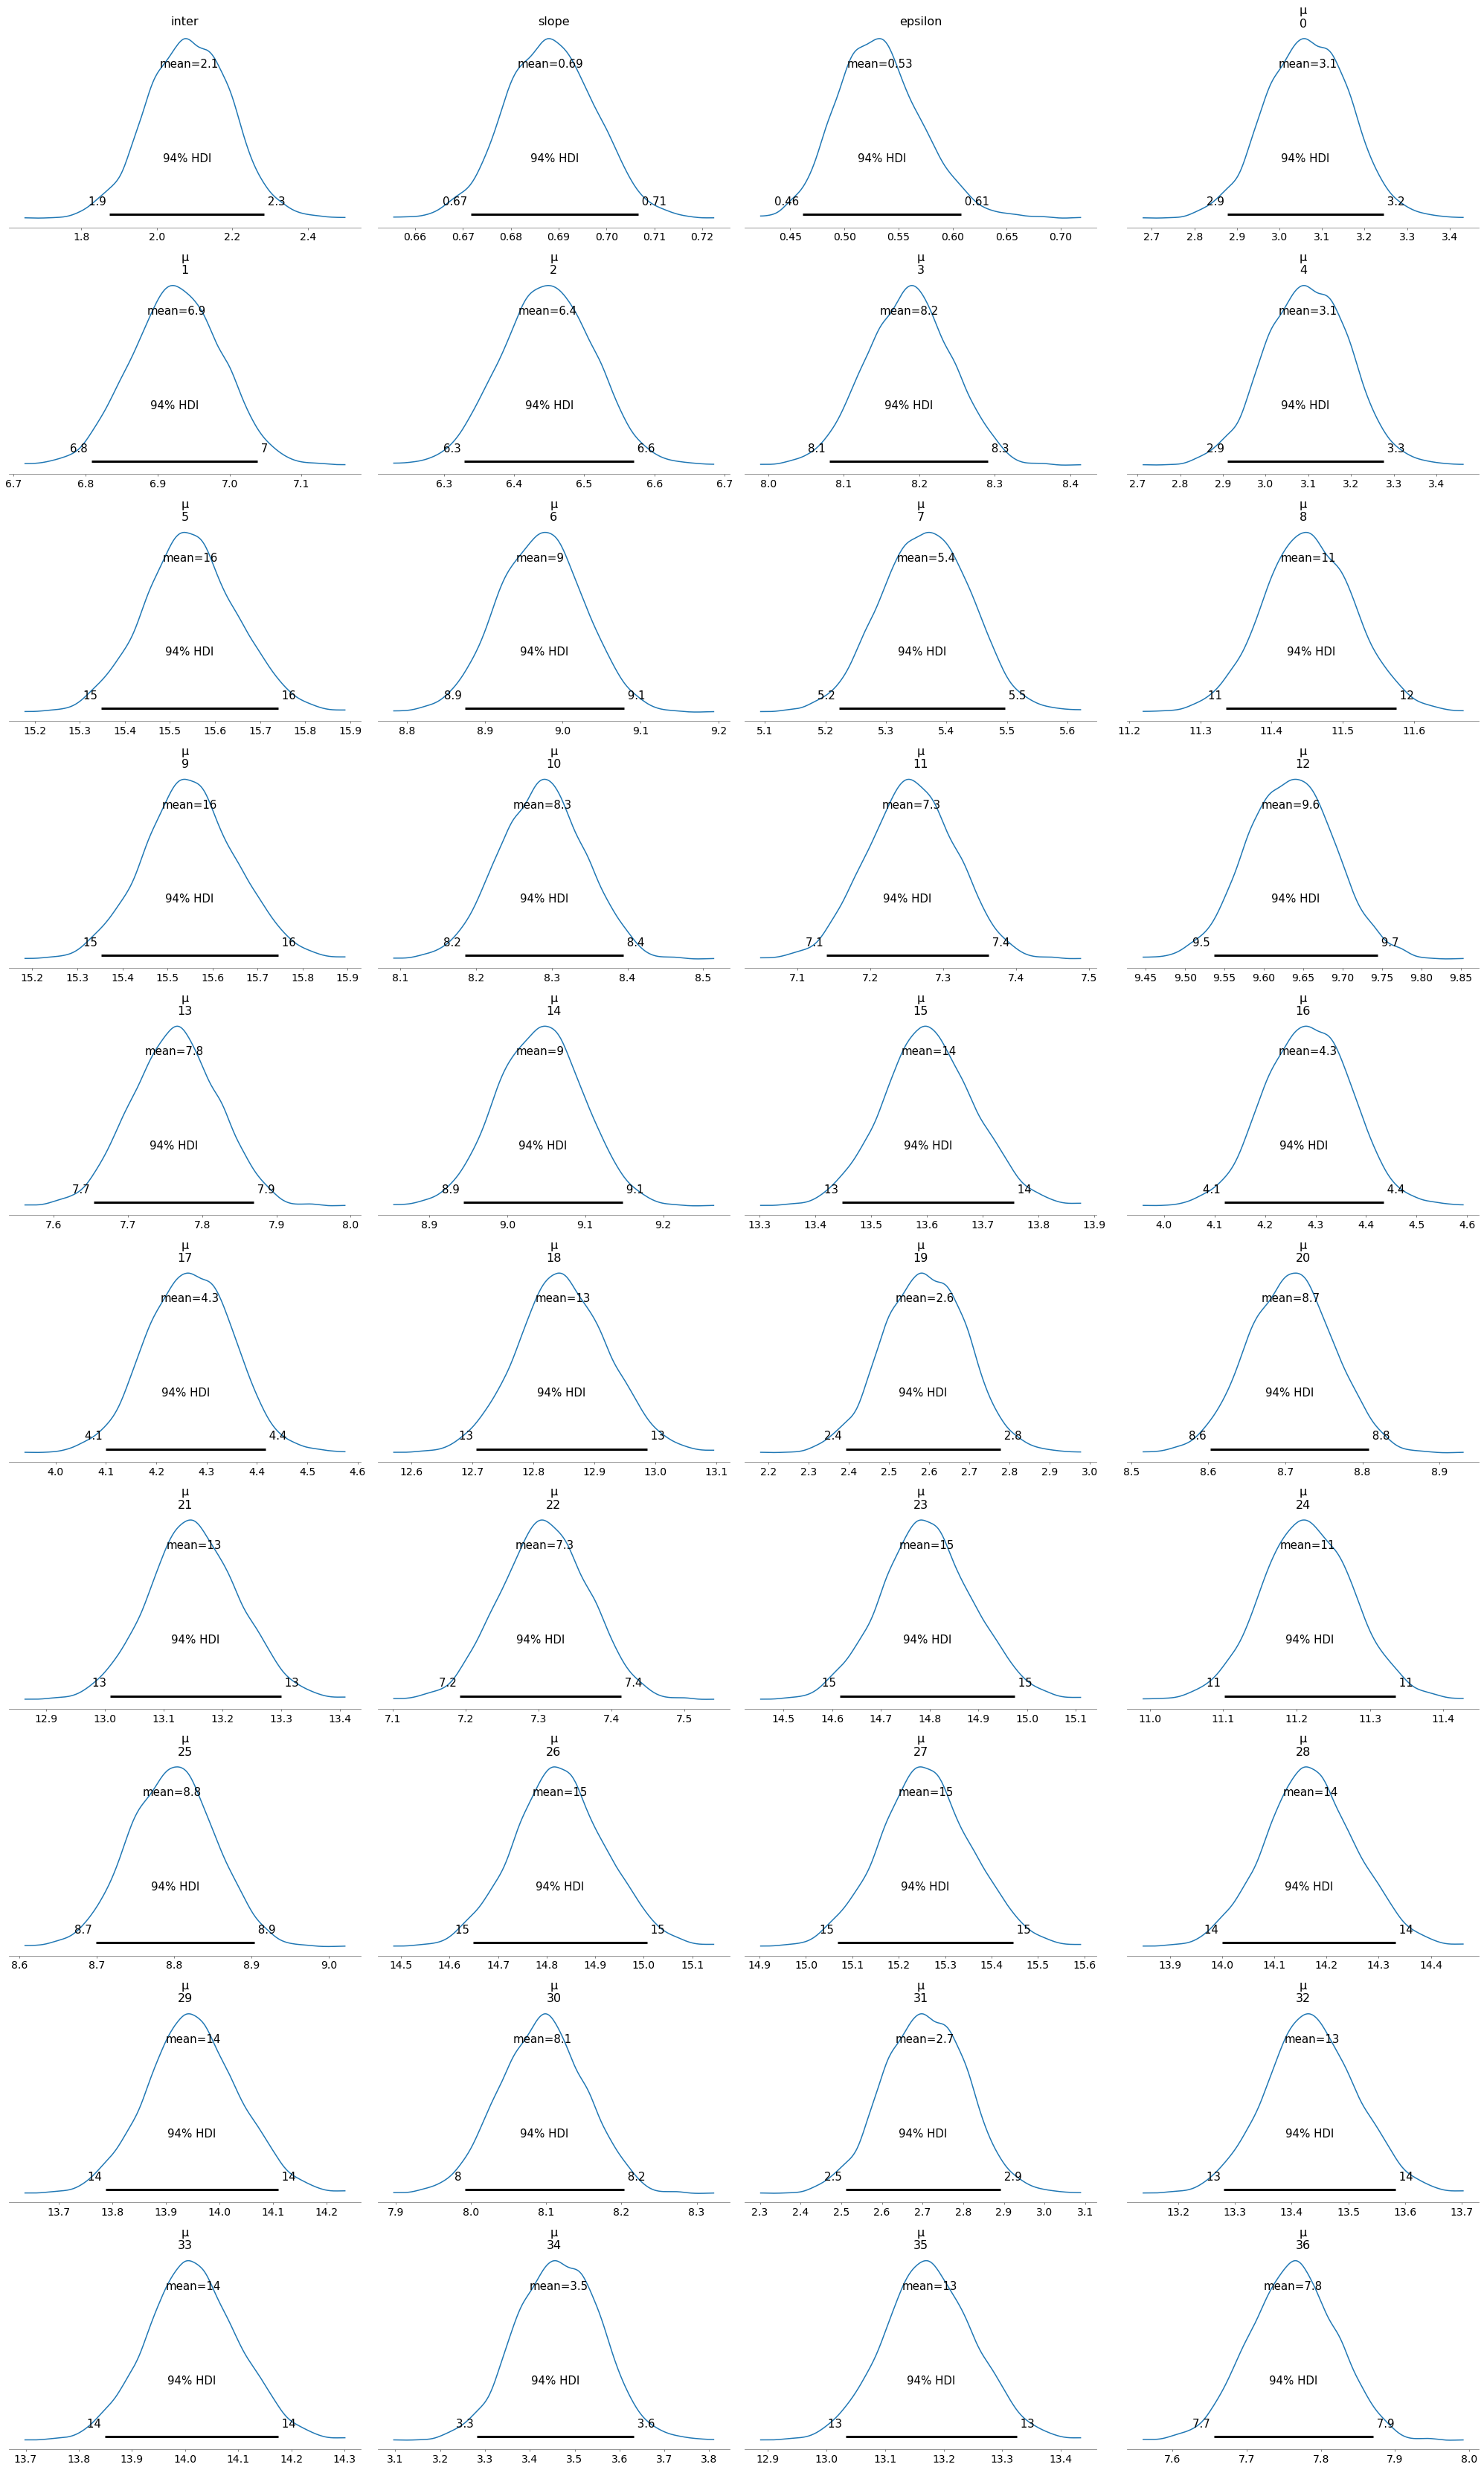

In [ ]:
az.plot_posterior(trace_Reg)

In [ ]:
#MLE
mean_feta_0 = trace_Reg['inter'].mean()
mean_feta_1 = trace_Reg['slope'].mean()

In [ ]:
i = range(0,len(trace_Reg['inter']), 2)

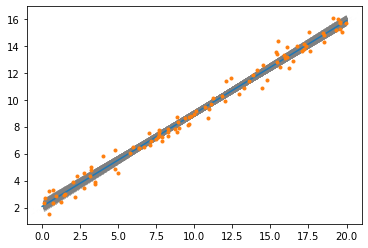

In [ ]:
plt.plot(x, trace_Reg['inter'][i]+ trace_Reg['slope'][i]*x[:,np.newaxis], c = 'gray', alpha = 0.5)
x1 = np.linspace(0,20, 1000)
plt.plot(x1, mean_feta_0 + mean_feta_1*x1)
plt.plot(x,y,'.')
plt.show()

In [ ]:
from scipy.stats import distributions as dist

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


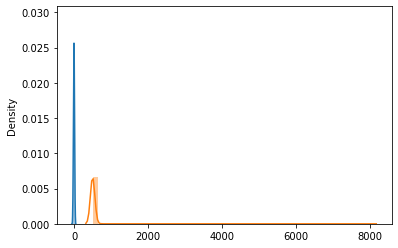

In [ ]:
theta_1 = dist.norm(0,14).rvs(1000)
sns.distplot(theta_1)
e = dist.halfcauchy(500).rvs(1000)
sns.distplot(e)

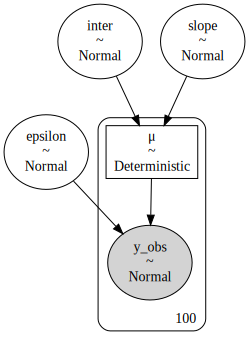

In [ ]:
pm.model_to_graphviz(Reg_Model)